In [1]:
# npと省略するのが普通
import numpy as np

In [2]:
a = np.array([10, 20, 30])
b1 = np.arange(10)
b2 = list(range(10))
print(a)
print(b1)
print(b2)

# list/arrayの見分け方。カンマがあるかないか

[10 20 30]
[0 1 2 3 4 5 6 7 8 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


list vs array  
全く別物。  
Listは動的。  
Numpyは、裏でC/Fortranが走っている。-> 静的  


In [3]:
# list
a = [1, 2, 3]
b = [10, 20, 30]
print(a, b)
print(a + b)

[1, 2, 3] [10, 20, 30]
[1, 2, 3, 10, 20, 30]


In [5]:
a1 = np.asarray(a)
b1 = np.asarray(b)
print(a1, b1)
print()

# numericでできることは大抵できる。
print(a1 + 100)
print(a1 * 100)
print(a1 / 100)
print(a1 ** 2)
print()

# できるけど微妙
print(a1 + [1])

# 同一次元同士の四則演算もできる。
print(a1 + b1)
print(a1 * b1)
print(a1 / b1)
print()

# NG
# print(np.arange(4) + [1, 2])

# concat array
print(np.concatenate([a1, b1]))

[1 2 3] [10 20 30]

[101 102 103]
[100 200 300]
[ 0.01  0.02  0.03]
[1 4 9]

[2 3 4]
[11 22 33]
[10 40 90]
[ 0.1  0.1  0.1]

[ 1  2  3 10 20 30]


In [6]:
# listでも掛け算はできる。ただし機能は異なる。
print(a * 2)

# list NG
print(a / 2)
print(a + 10)

[1, 2, 3, 1, 2, 3]


TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [15]:
# tuple is immutable
a = (1, 2, 3)

# tuple NG
a[0] = 100
a.append(10)

AttributeError: 'tuple' object has no attribute 'append'

In [10]:
# 多次元array
# arrayが最も活躍
a = np.arange(6).reshape(2, 3)
print(a)
print(a.shape)

print('-' * 20)

b = np.arange(24).reshape(2, 3, 4)
print(b)
print(b.shape)

[[0 1 2]
 [3 4 5]]
(2, 3)
--------------------
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
(2, 3, 4)


In [11]:
# array中のある値を取得
print(a[0, 0], a[0, 1], a[1, 2])
print(b[0, 2, 3], b[1, 0, 2])

print('*' * 20)

# listでも同様のことはできるが、書き方が異なり少し面倒い。
la = [[0,1,2], [3,4,5]]
print(la[0][0], la[0][1], la[1][2])

# arrayはlistの書き方でも許される。原理的に考えればわかるけど。。
print(a[0][0], a[0][1], a[1][2])
print(a[0, 0], a[0, 1], a[1, 2])

0 1 5
11 14
********************
0 1 5
0 1 5
0 1 5


In [12]:
# slice; 1次元の場合と同じ。それを各次元に適用するだけ。
print(a, '\n')
print(a[:, :], '\n')
print(a[:1, 1:], '\n')
print(a[:, 0], '\n')
print('-' * 20)

# 下の次元のindexは省略可能
print(b, '\n')
print(b[1:], b[1:].shape, '\n')

# こんな書き方も可能 (1次元ずつ考えればわかる)
print(b[0, :2, 3], b[0, :2, 3].shape, '\n')
print('-' * 20)

# slice; list
print(la)

# 値を取得するときのように上手くいかない。
print(la[:1][1:])
#これを見ればわかる。
print(la[:1])
# こうすれば同じ。とても面倒い。arrayのありがたさがわかる。
print([v[1:] for v in la[:1]])

[[0 1 2]
 [3 4 5]] 

[[0 1 2]
 [3 4 5]] 

[[1 2]] 

[0 3] 

--------------------
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]] 

[[[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]] (1, 3, 4) 

[3 7] (2,) 

--------------------
[[0, 1, 2], [3, 4, 5]]
[]
[[0, 1, 2]]
[[1, 2]]


In [30]:
# list vs array
# array最大のメリット。計算めっちゃ速い（静的型のメリット）。
# デメリットは簡単に変更できないこと。
# 用途によって、listとどちらを使うか判断。

N = 100000
xs = range(N)

print('List')
%timeit [x**2 for x in xs]

print('\nArray')
xa = np.asarray(xs)
%timeit xa**2

print('*' * 10)
x2 = np.arange(N).reshape(int(N/2), 2)
x2l = list(x2)
print('List')
%timeit [v[0] for v in x2l]
print('\nArray')
%timeit x2[:, 0]

print('*' * 10)
print('list -> array')
# overheadには気をつけたい
%timeit xa = np.asarray(xs)

List
10 loops, best of 3: 49.9 ms per loop

Array
10000 loops, best of 3: 109 µs per loop
**********
List
100 loops, best of 3: 8.21 ms per loop

Array
The slowest run took 12.92 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 448 ns per loop
**********
list -> array
100 loops, best of 3: 17.9 ms per loop


In [35]:
#　Advanced; stack
a = np.arange(9).reshape(3, 3)
b = 2 * a
print(a)
print(b)
print('*' * 10)
print(np.hstack((a, b)))
print(np.concatenate([a, b], axis=1))
print('*' * 10)
print(np.vstack((a, b)))
print(np.concatenate([a, b], axis=0))


[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0  2  4]
 [ 6  8 10]
 [12 14 16]]
**********
[[ 0  1  2  0  2  4]
 [ 3  4  5  6  8 10]
 [ 6  7  8 12 14 16]]
[[ 0  1  2  0  2  4]
 [ 3  4  5  6  8 10]
 [ 6  7  8 12 14 16]]
**********
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 0  2  4]
 [ 6  8 10]
 [12 14 16]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 0  2  4]
 [ 6  8 10]
 [12 14 16]]


In [14]:
# Advanced; mask
a = np.arange(10)
mask = a > 4
print(a)
print(mask)
print(a[mask])
print(a[a > 4])

sum(a>4) / a.size

[0 1 2 3 4 5 6 7 8 9]
[False False False False False  True  True  True  True  True]
[5 6 7 8 9]
[5 6 7 8 9]


0.5

In [20]:
# 楽ちん計算
a = np.arange(10)
print(np.mean(a))
print(np.median(a))
print(np.max(a))
print(np.min(a))
print(min(a))

b = a.reshape(2, 5)
print(b)
print(np.mean(b, axis=0))
print(np.max(b, axis=1))
print()

4.5
4.5
9
0
0
[[0 1 2 3 4]
 [5 6 7 8 9]]
[ 2.5  3.5  4.5  5.5  6.5]
[4 9]



In [21]:
# 初期化
a = np.zeros((4, 3), dtype=np.int)
b = np.ones((4, 3))
print(a)
print(b)

[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.] 
 [  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.]


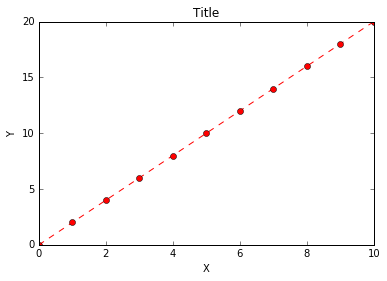

In [34]:
# Plot basics
%matplotlib inline
import matplotlib.pyplot as plt

# x = np.arange(10)
x = np.linspace(0, 10, 11)
y = 2 * x
print(x, '\n', y)

plt.clf()
# 一瞬で描ける。個人的には、Pythonの最も良い部分の一つ。
# plt.plot(x, y)

#plt.plot(x, y, 'o')
#plt.plot(x, y, 'o-')
plt.plot(x, y, 'ro--')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Title')


[[ 0.   0.5]
 [ 1.   1.5]
 [ 2.   2.5]
 [ 3.   3.5]
 [ 4.   4.5]
 [ 5.   5.5]
 [ 6.   6.5]
 [ 7.   7.5]
 [ 8.   8.5]
 [ 9.   9.5]]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.] [ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5]


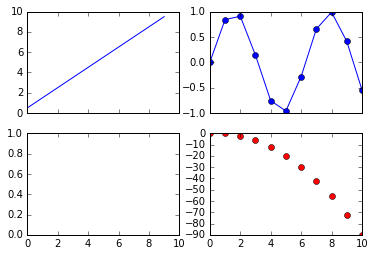

In [16]:
x = np.linspace(0, 10, 11)

data = np.arange(20).reshape(10, 2) / 2.
# カラムごとに取得。よく使われる。
x2, y2 = data[:, 0], data[:, 1]
print(data)
print(x2, y2)

fig, axes = plt.subplots(2, 2, sharex=True)
axes[0, 0].plot(x2, y2)  # y = 2x
axes[0, 1].plot(x, np.sin(x), 'o-')
axes[1, 1].plot(x, x - x**2, 'ro')